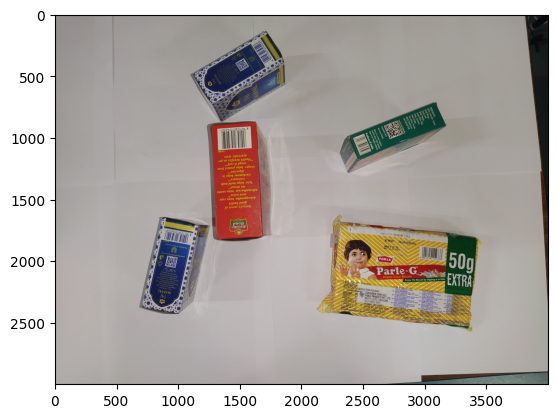

b'http://everestspices.com/?ref=qr'
QRCODE
b'8901719112737'
EAN13
b'8901030656026'
EAN13
b'8901030574252'
EAN13


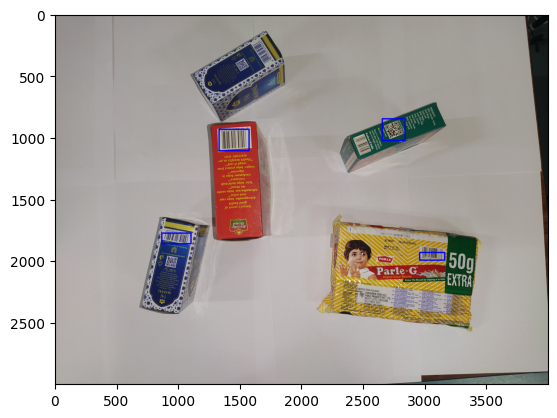

In [1]:
# Importing library
import cv2
import numpy as np
from pyzbar.pyzbar import decode
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as img
def BarcodeReader(image):
   
   # read the image in numpy array using cv2
   img = cv2.imread(image)
   plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
   plt.show()
   # Decode the barcode image
   detectedBarcodes = decode(img)
   #print(detectedBarcodes)
   #If not detected then print the message
   if not detectedBarcodes:
        print("Barcode Not Detected or your barcode is blank/corrupted!")
   else:
   # Traverse through all the detected barcodes in image
    bar_code_data=[]
    bar_code_type=[]
    bar_code=pd.DataFrame()
    for barcode in detectedBarcodes:
        # Locate the barcode position in image
        (x, y, w, h) = barcode.rect
        cropped_img=img[x:x+w,y:y+h]
        # Put the rectangle in image using
        # cv2 to highlight the barcode
        cv2.rectangle(img, (x-20, y-20),(x + w+20, y + h+20),(255, 0, 0), 10)
        
        if barcode.data!="":
        
        # Print the barcode data
           print(barcode.data)
           print(barcode.type)
           bar_code_data.append(barcode.data)
           bar_code_type.append(barcode.type)
    bar_code['Barcode Data']=bar_code_data
    bar_code['Barcode Type']=bar_code_type  
    bar_code['Count'] = bar_code['Barcode Data'].value_counts()[1]
   #Display the image
   plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
   plt.show()
   return bar_code 

if __name__ == "__main__":
# Take the image from user
    image="img4.jpg"
    bar_code=BarcodeReader(image)
    #bounding_box(image)

In [2]:
bar_code.head()

,Barcode Data,Barcode Type,Count
0,b'http://everestspices.com/?ref=qr',QRCODE,1
1,b'8901719112737',EAN13,1
2,b'8901030656026',EAN13,1
3,b'8901030574252',EAN13,1
